In [61]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [63]:
import pandas_datareader as pdr
import yfinance as yf

In [64]:
from datetime import datetime

In [65]:
from __future__ import division

In [66]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [67]:
start_date = datetime(2022,10,17)
end_date = datetime(2023,10,16)

In [70]:
for stock in tech_list:
    globals()[stock] = yf.download(stock,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [71]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,141.070007,142.899994,140.270004,142.410004,141.570160,85250900
2022-10-18,145.490005,146.699997,140.610001,143.750000,142.902252,99136600
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.011612,61758300
2022-10-20,143.020004,145.889999,142.649994,143.389999,142.544357,64522000
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401505,86548600
...,...,...,...,...,...,...
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000
2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100


In [72]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


In [73]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,163.238881,164.965760,161.723480,163.430680,163.052648,6.552043e+07
std,18.896464,18.689423,19.114018,18.869796,19.047515,2.134965e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,147.864998,149.954998,146.264996,148.049999,147.489712,5.052690e+07
50%,164.945000,166.299995,163.959999,165.279999,164.829117,6.077235e+07
75%,178.312504,180.052498,177.110004,178.340000,178.337498,7.489575e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [74]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-17 to 2023-10-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

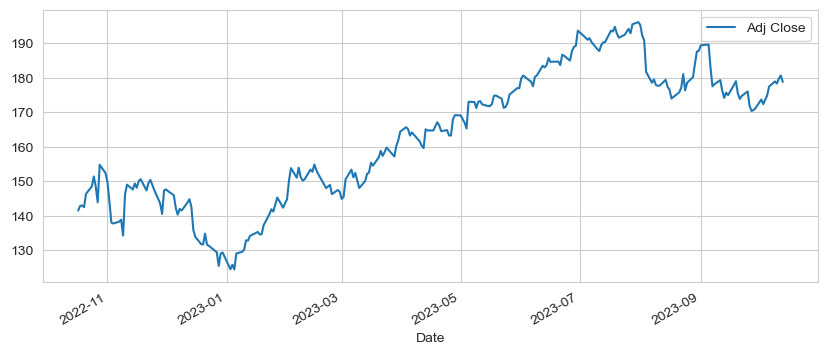

In [75]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

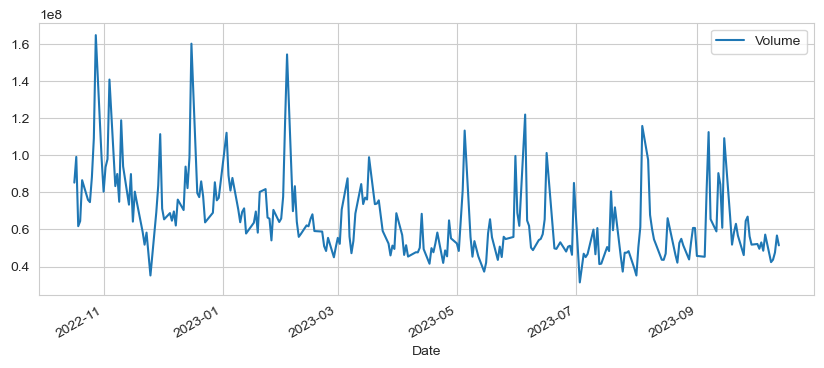

In [77]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [83]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

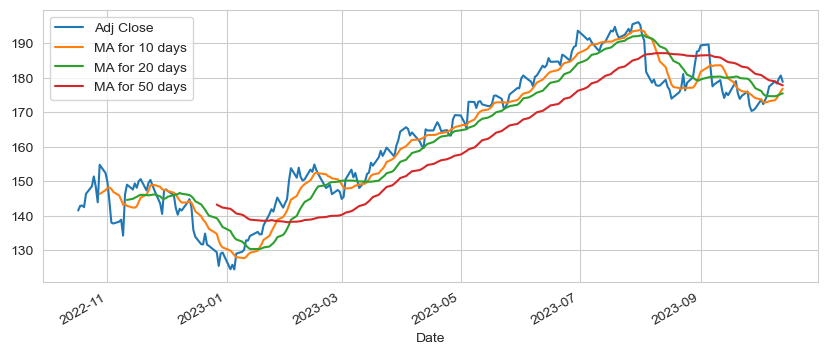

In [84]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))


<Axes: xlabel='Date'>

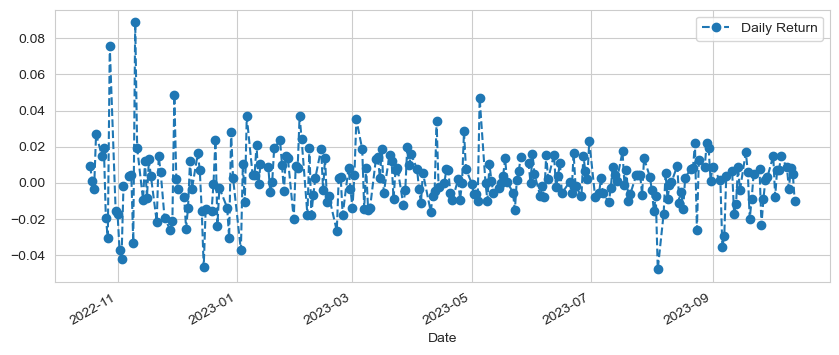

In [85]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/var/folders/0_/wxk601mn6db9jgljxw9428qw0000gn/T/ipykernel_4076/161050587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

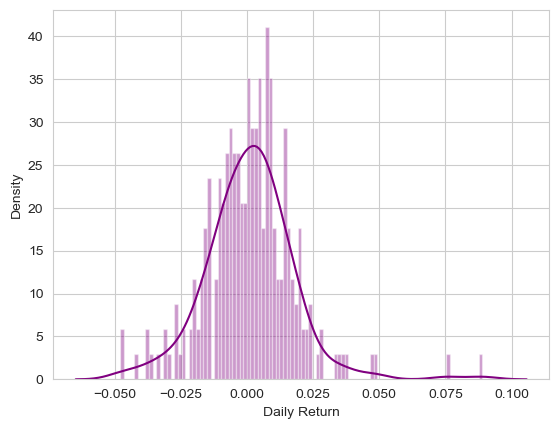

In [86]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<Axes: >

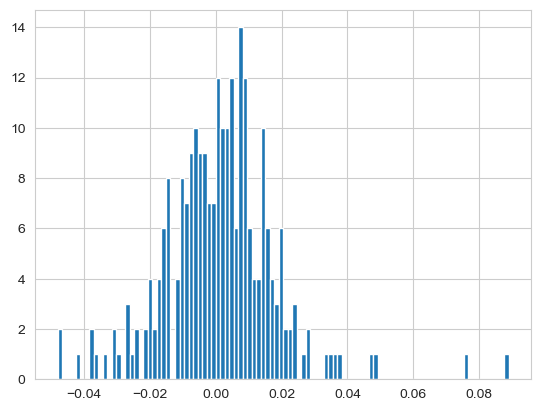

In [87]:
AAPL['Daily Return'].hist(bins=100)

In [91]:
closing_df = yf.download(tech_list, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [92]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-17,141.570160,113.790001,100.779999,235.257248
2022-10-18,142.902252,116.360001,101.389999,236.217941
2022-10-19,143.011597,115.070000,100.290001,234.217270
2022-10-20,142.544388,115.250000,100.529999,233.890442
2022-10-21,146.401505,119.320000,101.480003,239.803299


In [93]:
tech_rets = closing_df.pct_change()

In [94]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-17,NaN,NaN,NaN,NaN
2022-10-18,0.009409,0.022585,0.006053,0.004084
2022-10-19,0.000765,-0.011086,-0.010849,-0.008470
2022-10-20,-0.003267,0.001564,0.002393,-0.001395
2022-10-21,0.027059,0.035315,0.009450,0.025280


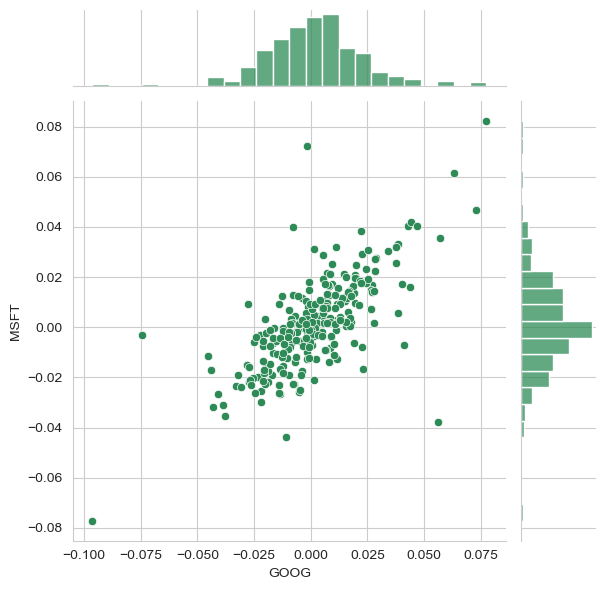

In [101]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

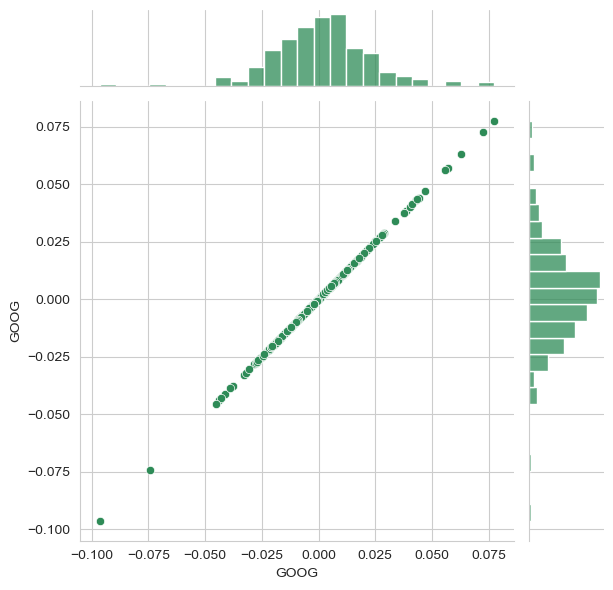

In [102]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

/Users/tylercoen_macbookair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


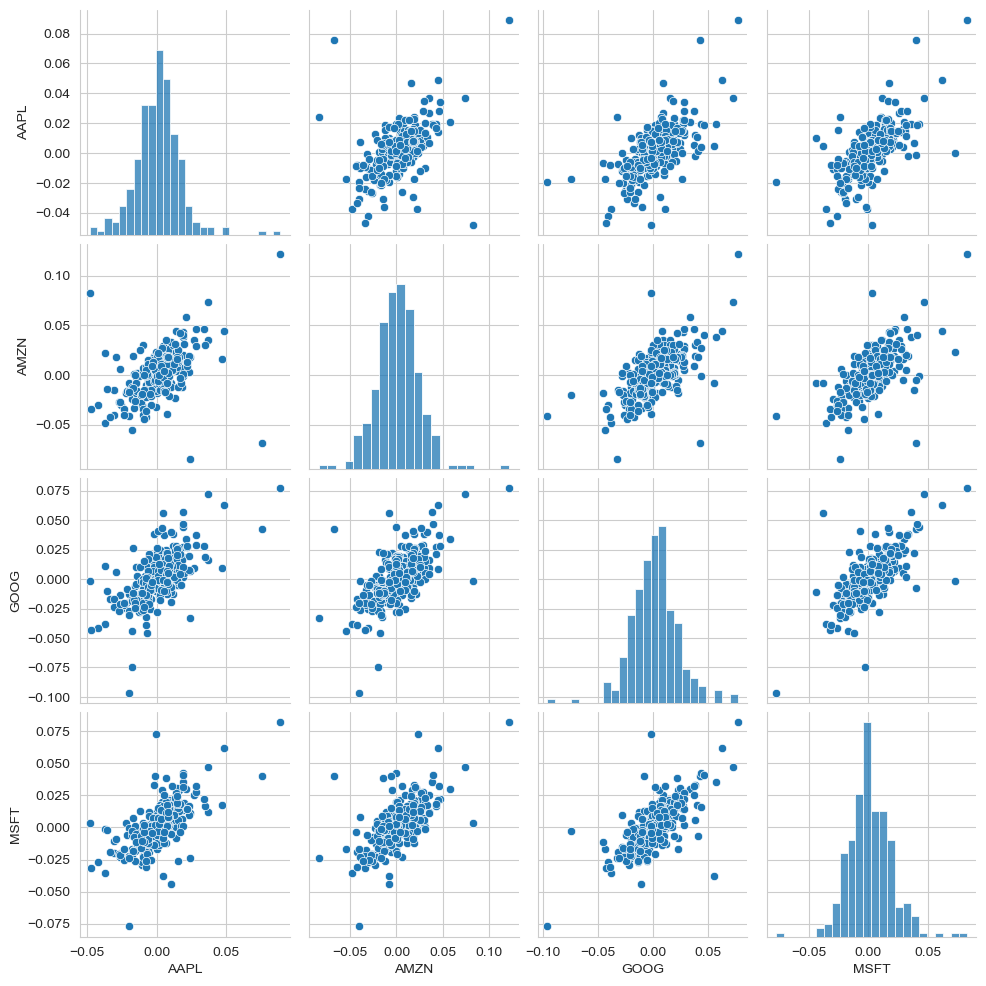

In [103]:
sns.pairplot(tech_rets.dropna())

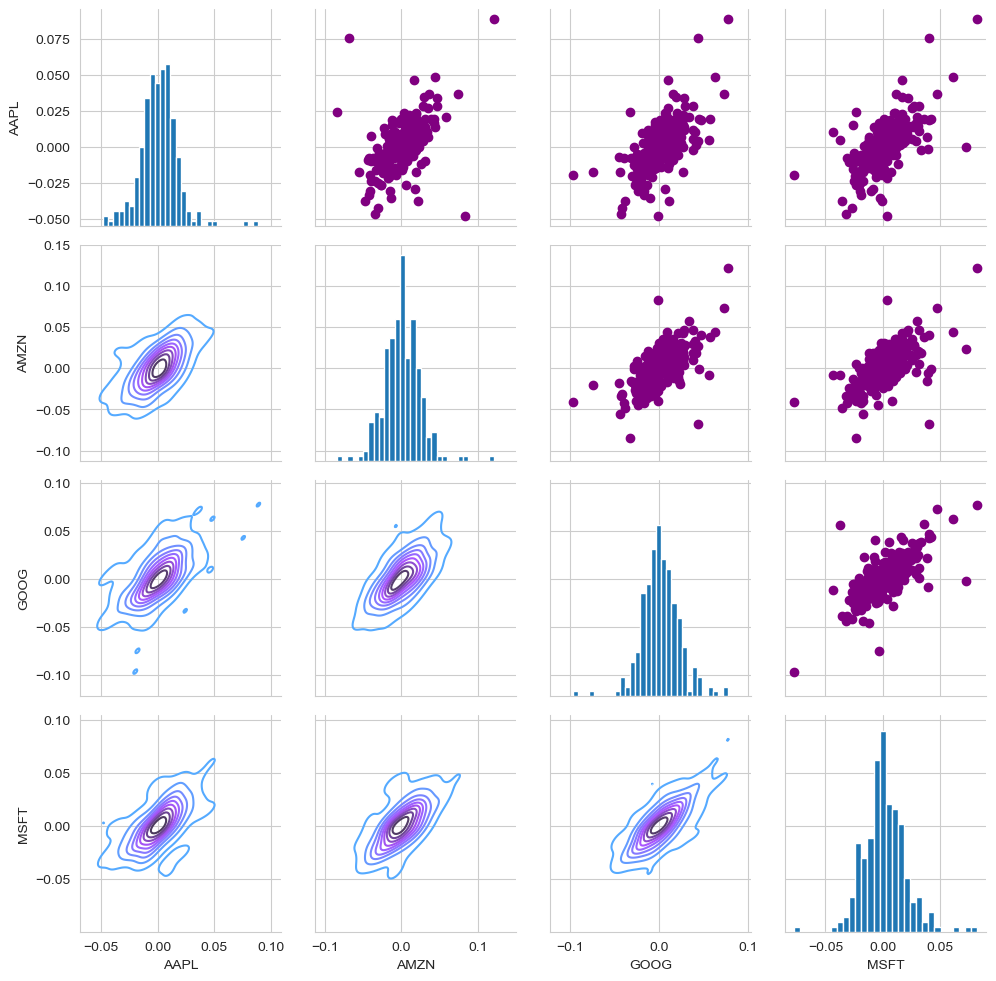

In [104]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

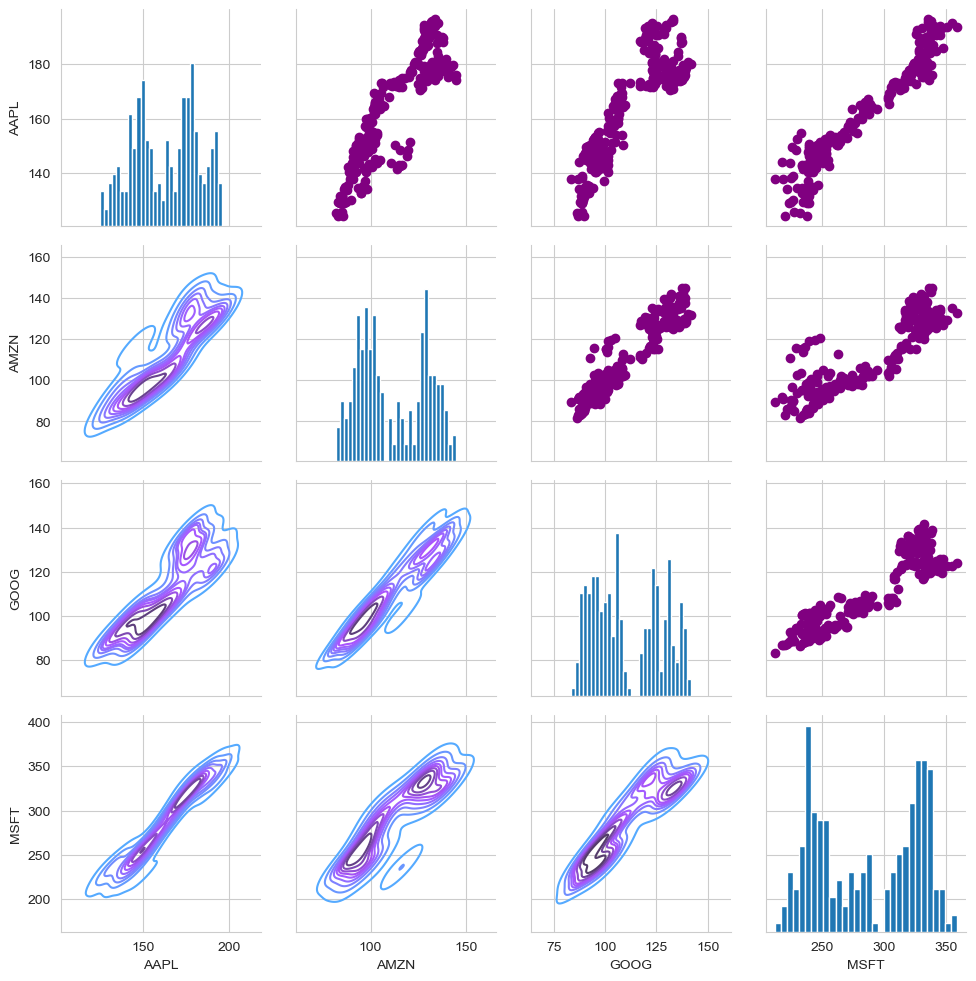

In [105]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

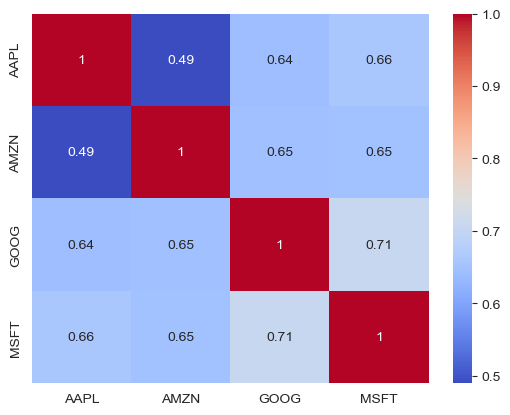

In [107]:
correlation_matrix = tech_rets.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [108]:
rets = tech_rets.dropna()

/var/folders/0_/wxk601mn6db9jgljxw9428qw0000gn/T/ipykernel_4076/2588495534.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(


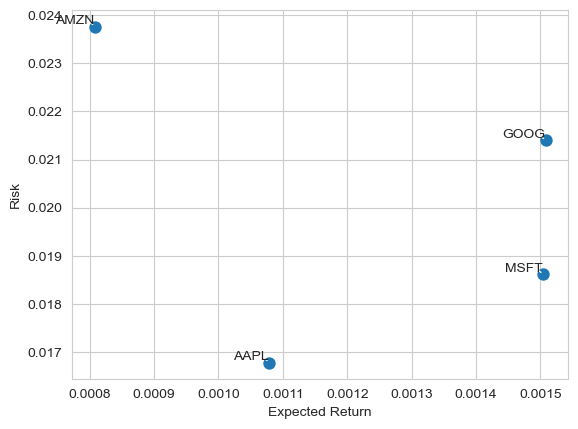

In [110]:
area = np.pi*20

plt.scatter(x=rets.mean(),y=rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        textcoords='offset points',
        ha='right',
        va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )


/var/folders/0_/wxk601mn6db9jgljxw9428qw0000gn/T/ipykernel_4076/161050587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

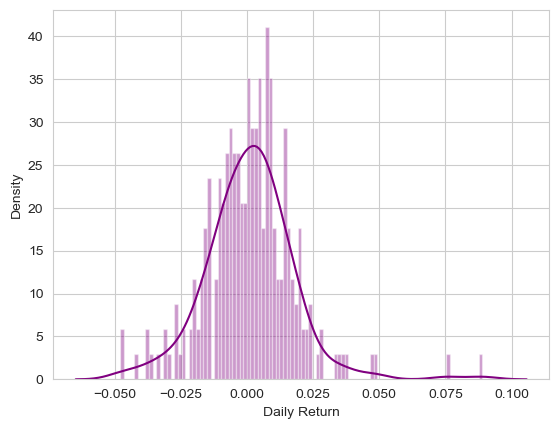

In [111]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [113]:
rets['AAPL'].quantile(0.05) #95% of the time your worst daily loss won't exceed 2.58%

-0.025850288870444427

In [114]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [117]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [118]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

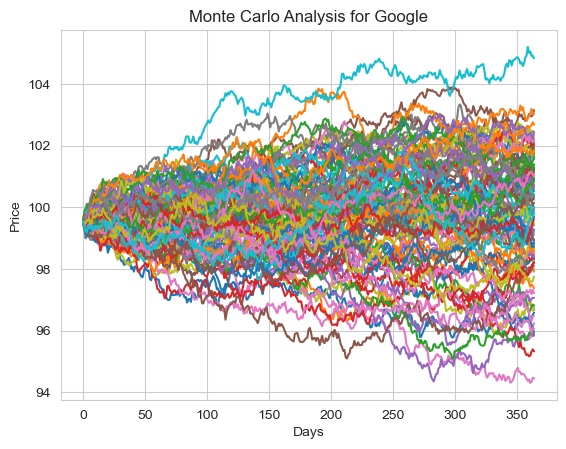

In [119]:
start_price = 99.52

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [120]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

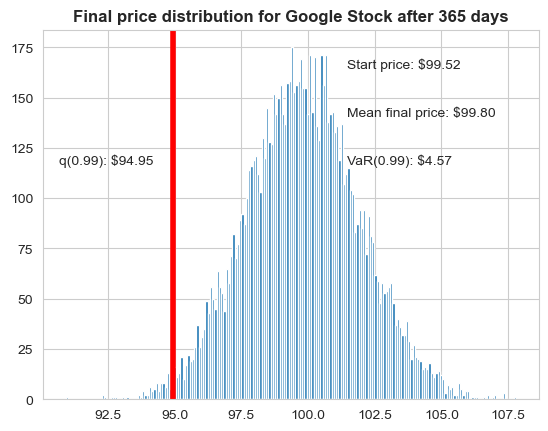

In [121]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# starting price
plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)

# mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' %(start_price - q))

# display 1% quartile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' % q)

# plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')